# Image Classifier

### Step 1 - Collecting Data
### Step 2 - Importing Libraries and Split Data into Train and Test Sets

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### Step 3 - Building the Network

1. Convolution
- Filters: dimensionality of the output space (matrix size)
- Kernel Size: height and width of the 2D window
- Strides: strides of the convolution

2. Pooling
3. Flattening
4. Full Connection

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Step 4: Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Step 5: Training

In [5]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 10,
                         validation_data = test_set)


Epoch 1/10


/var/folders/5m/l4wdc7bs25b7d_ztg1721x6w0000gn/T/ipykernel_99264/1849207206.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,
2022-07-19 18:45:13.766837: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 5s 99ms/step - loss: 0.7039 - accuracy: 0.5019 - val_loss: 0.6914 - val_accuracy: 0.5035
Epoch 2/10
50/50 [==============================] - 5s 97ms/step - loss: 0.6904 - accuracy: 0.5300 - val_loss: 0.6885 - val_accuracy: 0.5040
Epoch 3/10
50/50 [==============================] - 5s 98ms/step - loss: 0.6838 - accuracy: 0.5375 - val_loss: 0.6887 - val_accuracy: 0.5050
Epoch 4/10
50/50 [==============================] - 5s 95ms/step - loss: 0.6710 - accuracy: 0.6112 - val_loss: 0.6717 - val_accuracy: 0.5690
Epoch 5/10
50/50 [==============================] - 5s 98ms/step - loss: 0.6633 - accuracy: 0.6106 - val_loss: 0.6507 - val_accuracy: 0.6095
Epoch 6/10
50/50 [==============================] - 5s 98ms/step - loss: 0.6366 - accuracy: 0.6438 - val_loss: 0.6226 - val_accuracy: 0.6655
Epoch 7/10
50/50 [==============================] - 5s 96ms/step - loss: 0.6188 - accuracy: 0.6706 - val_loss: 0.6187 - val_accuracy: 0.6535
Epoch 8/10
50/50 [======

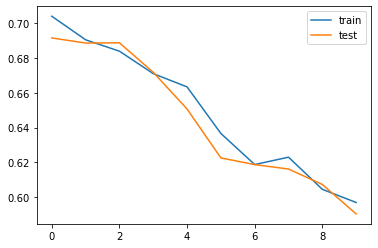

In [6]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Step 6 - Testing

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img('random_dog.png', target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)


dog
